## Synthetic experiment 
This notebook shows some basic usage of the proposed toolbox. The synthetic dataset considered is a tri-variate sinusoidal signal composed by 3 sines with the same frequency and different phase. The first part of the experiment consists in interpolating the unobserved part of the functions given a finite set of noise-corrupted observations

In [1]:
import mogptk
import numpy as np
%reload_ext autoreload
%autoreload 2

## Synthetic data generation

In [2]:
data = mogptk.Data()

#Sine(6X) + Noise
x = np.sort(np.random.uniform(0, 4, 20))
y = np.sin(6*x) + np.random.standard_t(3, x.shape)*0.03
data.add(x, y)

#Sine(6X+2) + Noise
x = np.sort(np.random.uniform(0, 4, 10))
y = np.sin(6*x + 2) + np.random.standard_t(3, x.shape)*0.03
data.add(x, y)

#Sine(6X+2) - Sine(4X) + Noise
x = np.sort(np.random.uniform(0, 4, 10))
y = np.sin(6*x + 2) - np.sin(4*x) + np.random.standard_t(3, x.shape)*0.03
data.add(x, y)

data.remove_range(0, start=2.0, end=None)

data.set_latent_function(0, lambda x: np.sin(6*x))
data.set_latent_function(1, lambda x: np.sin(6*x+2))
data.set_latent_function(2, lambda x: np.sin(6*x+2)-np.sin(4*x))

In [3]:
kernel = mogptk.MOSM(data, 3)

In [5]:
model = mogptk.Model(data, kernel)
model.optimize()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -15.791887
  Number of iterations: 1000
  Number of functions evaluations: 1166


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -15.791887
  Number of iterations: 1000
  Number of functions evaluations: 1166


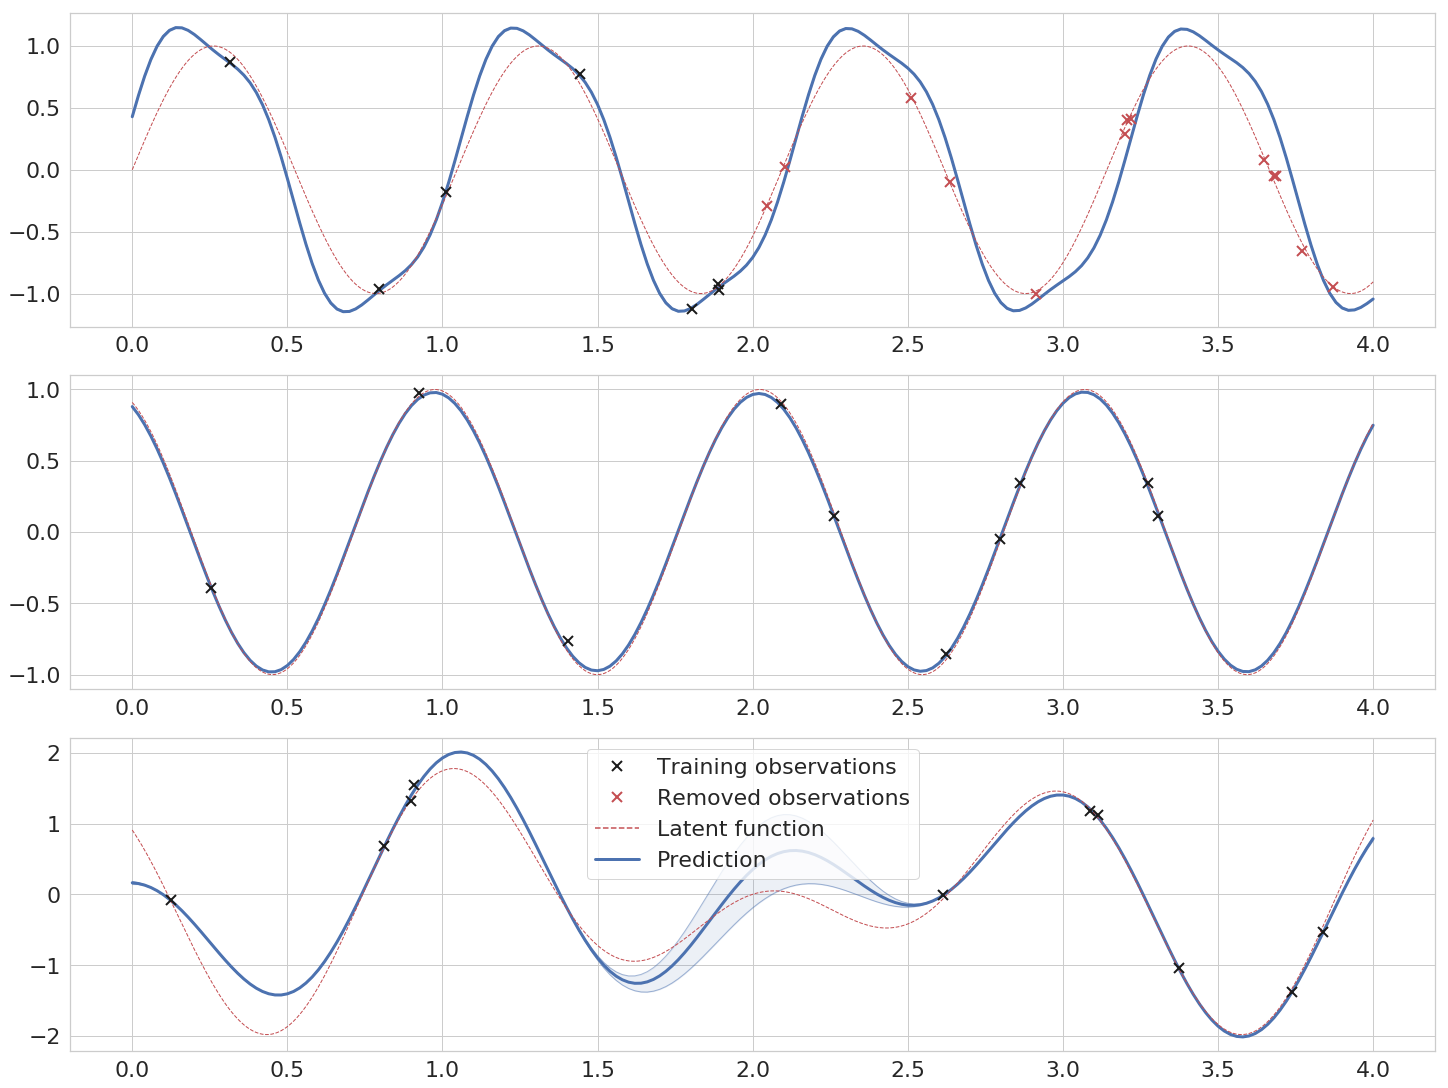

In [6]:
model.set_prediction_range(0, 0, 4, 0.02)
model.set_prediction_range(1, 0, 4, 0.02)
model.set_prediction_range(2, 0, 4, 0.02)
model.predict()

mogptk.plot(model)